In [1]:
import pandas as pd 
import numpy as np
import pickle 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import joblib
import pickle

In [169]:
# Load Data Train csv
df_train = pickle.load(open('Train_Test/train_bams.p','rb'))
n_descriptor = 25 #kombinasi terbaik

In [170]:
# Load Pickle corr_desc 100
label = pickle.load(open("corr/corr_desc100.p", "rb"))
train = df_train.loc[:,label]
train["pIC50"]= df_train.iloc[:,-1]

In [171]:
train.head()

,VCH-5,C2SP3,SHCsatu,MATS6s,VCH-6,nHCsatu,MATS6e,minHdsCH,mindsCH,minHCsats,...,LipinskiFailures,MATS4p,maxHBint8,nssCH2,AATS8v,ASP-1,SRW7,SHCsats,ATSC2e,pIC50
125,0.079057,5,0.748232,-0.073039,0.204167,1.0,-0.020915,0.000000,0.000000,0.589585,...,0,0.034490,3.059484,6.0,169.903090,0.434891,4.595120,4.651469,0.844981,5.958
74,0.047140,5,2.428692,-0.157112,0.067974,3.0,-0.171494,0.637067,1.302805,0.700579,...,0,-0.046244,0.000000,3.0,162.197115,0.449608,4.595120,3.961000,0.591889,5.854
1,0.000000,4,1.449385,-0.075440,0.052908,2.0,-0.081837,0.484234,0.478514,0.545523,...,0,-0.085377,0.000000,7.0,147.616939,0.448320,2.708050,5.293406,0.140318,6.292
110,0.038490,5,0.756321,-0.060055,0.144355,1.0,-0.076918,0.000000,0.000000,0.599592,...,0,0.001763,3.187050,6.0,155.342091,0.435972,4.442651,4.716727,0.677952,7.921
99,0.047140,5,2.472921,-0.100758,0.095752,3.0,-0.122192,0.622275,1.407085,0.718472,...,0,-0.076616,0.000000,4.0,171.431645,0.447165,4.595120,4.036985,0.912688,5.854


In [172]:
# Data train dan validasi(test)
train, test = train_test_split(train, test_size = 0.2, random_state = 10)
train.shape, test.shape 

((85, 101), (22, 101))

In [173]:
X_train = train.iloc[:,:-1]
X_test = test.iloc[:,:-1]
y_train = train.iloc[:, [-1]]
y_test = test.iloc[:,[-1]]

In [174]:
train

,VCH-5,C2SP3,SHCsatu,MATS6s,VCH-6,nHCsatu,MATS6e,minHdsCH,mindsCH,minHCsats,...,LipinskiFailures,MATS4p,maxHBint8,nssCH2,AATS8v,ASP-1,SRW7,SHCsats,ATSC2e,pIC50
65,0.000000,3,0.690610,-0.103790,0.020833,1.0,-0.125246,0.000000,0.000000,0.566899,...,0,-0.126003,0.000000,6.0,143.422792,0.455184,2.70805,4.434947,-0.567806,5.347
86,0.047140,5,4.016277,-0.085220,0.095752,5.0,-0.113502,0.541295,0.411607,0.718466,...,0,-0.082442,0.000000,4.0,170.016127,0.443095,4.59512,4.037274,1.375711,5.509
111,0.000000,5,0.699563,-0.072084,0.156900,1.0,-0.076780,0.000000,0.000000,0.576525,...,0,-0.003772,0.000000,6.0,156.815454,0.439524,0.00000,4.379723,0.990923,6.309
27,0.091287,6,0.718518,-0.040410,0.152543,1.0,-0.054141,0.000000,0.000000,0.459595,...,0,-0.062571,0.000000,6.0,152.371724,0.446110,4.59512,5.032628,-0.040316,8.201
132,0.020412,5,0.798765,-0.060641,0.145522,1.0,-0.017984,0.000000,0.000000,0.659604,...,0,0.013722,4.383304,6.0,169.242993,0.437469,4.59512,5.119233,0.793022,7.301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,0.091287,6,0.763781,-0.063933,0.131027,1.0,-0.026642,0.000000,0.000000,0.517388,...,0,-0.066795,0.000000,6.0,146.906775,0.443067,4.59512,5.586728,5.345481,8.824
75,0.047140,5,2.511884,-0.131194,0.100049,3.0,-0.164723,0.630122,1.423497,0.728627,...,0,-0.033696,0.000000,4.0,171.385336,0.448320,4.59512,4.069730,0.353513,6.149
92,0.047140,5,3.454298,-0.126872,0.095752,4.0,-0.179701,0.630469,1.411716,0.466828,...,1,-0.089278,5.303527,5.0,168.375982,0.451893,4.59512,5.246979,0.204558,6.161
120,0.079057,5,0.694354,-0.087945,0.215408,1.0,-0.020591,0.000000,0.000000,0.570497,...,0,0.047113,0.000000,6.0,164.124288,0.437844,4.59512,4.340607,1.142244,7.221


In [175]:
X_train.shape

(85, 100)

In [176]:
#initialization
c1 = 1.49 #acceleration coefficient
c2 = 1.49 #acceleration coefficient
w = 0.73 #inertia weight
vel_limit = 0.6 #limit of velocity
n_part = 20 #number of particle
n_iter = 100 #number of iteration
n_desc = X_train.shape[1] #total number of descriptor
sel_desc = 25 #number of selected descriptor

In [177]:
# part
n_desc

100

In [178]:
model = LinearRegression()

In [179]:
# method PSO
# mse_list = list()

n_list = list()
for i in tqdm(range(20)):
    
    ### Initiate particles
    part = []
    for i in range(n_part):
        list_index = np.random.choice(X_train.shape[1], sel_desc, replace=False)
        list_index = list(list_index)
        list_index.sort()
        list_index
        part.append(list_index)

    ### Initiate Velocity
    vel = []
    for i in range(n_part):
        list_vel = list(np.zeros(sel_desc))
        vel.append(list_vel)

    pbest_part = []
    pbest_mse = []

    for i in range(n_part):
        pbestMse = np.inf
        pbest_mse.append(pbestMse)
        pbest_part.append(0)
    #print(pbest_mse)
    gbest_mse = np.inf

    for l in range(n_iter):
        for j in range(n_part):
            list_index = part[j]
            X_train_slice = X_train.iloc[:,list_index]
            X_test_slice = X_test.iloc[:,list_index]
            
            mmscaler = MinMaxScaler()
            mmscaler.fit(X_train_slice)
            sc_x_train = mmscaler.transform(X_train_slice)
            sc_x_test = mmscaler.transform(X_test_slice)
                    
            model.fit(X_train_slice, y_train)
            pred = model.predict(sc_x_test)
            mse_value = mean_squared_error(y_test, pred)
            if mse_value < pbest_mse[j]:
                pbest_mse[j] = mse_value
                pbest_part[j] = list_index[:]
        gbest_mse = min(pbest_mse)
        gbest_part = pbest_part[np.argmin(pbest_mse)]
        for j in range(n_part):
            for i in range(sel_desc):
                vel[j][i] = (w * vel[j][i]) + (c1 * np.random.rand() * (pbest_part[j][i]-part[j][i]))+(c2 * np.random.rand() * (gbest_part[i] - part[j][i]))
                if vel[j][i] > vel_limit:
                    vel[j][i] = vel_limit
                if vel[j][i] < -vel_limit:
                    vel[j][i] = -vel_limit
                part[j][i] = int(round(part[j][i]+vel[j][i]))
            
    n_list.append([gbest_part,gbest_mse])

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [03:29<00:00, 10.46s/it]


In [180]:
n_list
df = pd.DataFrame(n_list, columns=['Particles','MSE'])

In [181]:
df_sort = df.copy()
df_sort.sort_values('MSE', inplace=True)
df_sort

,Particles,MSE
7,"[1, 5, 10, 15, 19, 21, 21, 30, 31, 34, 37, 40,...",0.256274
4,"[5, 8, 10, 15, 17, 25, 32, 35, 40, 42, 49, 49,...",0.273232
3,"[1, 5, 10, 12, 15, 17, 22, 26, 30, 34, 38, 42,...",0.283180
18,"[5, 7, 9, 15, 17, 19, 21, 24, 32, 34, 40, 52, ...",0.379051
9,"[6, 7, 10, 11, 16, 21, 24, 26, 31, 34, 36, 38,...",0.430999
19,"[1, 5, 7, 18, 22, 26, 28, 32, 38, 39, 43, 45, ...",0.447592
2,"[1, 6, 10, 12, 15, 19, 24, 35, 40, 45, 47, 51,...",0.458616
6,"[1, 5, 9, 15, 18, 20, 25, 26, 32, 32, 37, 39, ...",0.482238
16,"[1, 6, 11, 12, 16, 21, 26, 34, 35, 39, 42, 45,...",0.514643
12,"[5, 7, 11, 15, 17, 23, 24, 28, 36, 39, 43, 45,...",0.593424


In [182]:
var = df.sort_values(by=['MSE'], inplace=True)
var = df['MSE']
var

7     0.256274
4     0.273232
3     0.283180
18    0.379051
9     0.430999
19    0.447592
2     0.458616
6     0.482238
16    0.514643
12    0.593424
1     0.599212
17    0.621719
8     0.678163
11    0.708657
5     0.744126
0     0.770672
13    1.157028
10    1.176509
15    1.411541
14    1.444276
Name: MSE, dtype: float64

In [183]:
# joblib.dump(var,'./mse/mse25.pkl')

['./mse/mse25.pkl']

In [184]:
# joblib.load('./mse/mse25.pkl')

7     0.256274
4     0.273232
3     0.283180
18    0.379051
9     0.430999
19    0.447592
2     0.458616
6     0.482238
16    0.514643
12    0.593424
1     0.599212
17    0.621719
8     0.678163
11    0.708657
5     0.744126
0     0.770672
13    1.157028
10    1.176509
15    1.411541
14    1.444276
Name: MSE, dtype: float64

In [185]:
desc_name = X_train.columns.tolist()
desc_name = np.array(desc_name)
print(desc_name)

['VCH-5' 'C2SP3' 'SHCsatu' 'MATS6s' 'VCH-6' 'nHCsatu' 'MATS6e' 'minHdsCH'
 'mindsCH' 'minHCsats' 'GATS6e' 'mindsN' 'maxdsN' 'maxHCsatu' 'maxHdsCH'
 'maxssCH2' 'ndsN' 'nHCsats' 'maxdsCH' 'RDF30i' 'MATS6m' 'minssssC'
 'MATS8i' 'SssssC' 'nHBAcc' 'MDEN-23' 'SdsN' 'AATSC6e' 'nssssC'
 'SpMax2_Bhs' 'RDF30u' 'MATS2i' 'ATSC6e' 'SpMax1_Bhs' 'nHBAcc_Lipinski'
 'GATS4i' 'AATSC6m' 'AATSC8i' 'GATS2i' 'RDF30e' 'HybRatio' 'ETA_EtaP_F_L'
 'AATSC2i' 'GATS2s' 'ETA_EtaP_L' 'maxHCsats' 'ATSC6m' 'GATS6s' 'AVP-7'
 'VCH-7' 'AVP-4' 'GATS6m' 'SpMax3_Bhs' 'ATSC2i' 'AATSC6s' 'ATSC6s'
 'AATS3v' 'GATS2e' 'VCH-4' 'TDB9v' 'ATSC8i' 'AVP-6' 'nO' 'SHBint7'
 'WTPT-4' 'SCH-5' 'minHsNH2' 'AATSC3p' 'MATS3p' 'AVP-5' 'SCH-4' 'GATS4p'
 'TDB9m' 'maxHBint4' 'SRW5' 'MDEC-34' 'ATSC3p' 'RDF30s' 'LOBMIN' 'ATSC2s'
 'MATS2s' 'SpMax7_Bhs' 'minHBint4' 'maxHBint5' 'n3Ring' 'SRW3' 'TDB9r'
 'nHBint4' 'VCH-3' 'SCH-3' 'TDB4i' 'LipinskiFailures' 'MATS4p' 'maxHBint8'
 'nssCH2' 'AATS8v' 'ASP-1' 'SRW7' 'SHCsats' 'ATSC2e']


In [186]:
best_desc = desc_name[df.loc[0,'Particles']]
best_desc = list(best_desc)
print(best_desc)

['SHCsatu', 'minHdsCH', 'mindsN', 'maxHdsCH', 'maxssCH2', 'RDF30i', 'RDF30i', 'SdsN', 'GATS4i', 'AATSC8i', 'GATS2s', 'GATS2s', 'VCH-7', 'AATSC6s', 'GATS2e', 'WTPT-4', 'MATS3p', 'GATS4p', 'SRW5', 'ATSC2s', 'n3Ring', 'VCH-3', 'VCH-3', 'AATS8v', 'AATS8v']


In [187]:
# joblib.dump(best_desc,'./desc/desc25.pkl')

['./desc/desc25.pkl']

In [188]:
# joblib.load('./desc/desc25.pkl')

['SHCsatu',
 'minHdsCH',
 'mindsN',
 'maxHdsCH',
 'maxssCH2',
 'RDF30i',
 'RDF30i',
 'SdsN',
 'GATS4i',
 'AATSC8i',
 'GATS2s',
 'GATS2s',
 'VCH-7',
 'AATSC6s',
 'GATS2e',
 'WTPT-4',
 'MATS3p',
 'GATS4p',
 'SRW5',
 'ATSC2s',
 'n3Ring',
 'VCH-3',
 'VCH-3',
 'AATS8v',
 'AATS8v']

In [189]:
# n_list = columns=['Particles','MSE']
# pickle.dump(n_list, open('data/5_list.p','wb'))

In [190]:
gbest_mse

0.447592340231126

In [191]:
y_pred = model.predict(X_test_slice)
mse = mean_squared_error(y_test, y_pred)
mse

0.49612060667112884

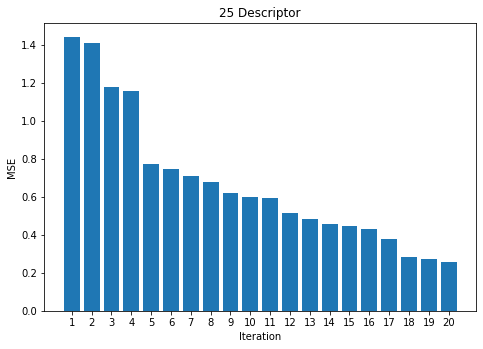

In [10]:
fig = plt.figure()
ax = fig.add_axes([0.5,0.5,1,1])
numb = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19','20']
mse = joblib.load('./mse/mse25.pkl')
mse = mse.sort_values(ascending=False)
ax.bar(numb,mse)
plt.title('25 Descriptor')
plt.xlabel('Iteration')
plt.ylabel('MSE')
# plt.savefig('./10 Deskriptor.png', format='png', dpi=1000, bbox_inches="tight")
plt.show()

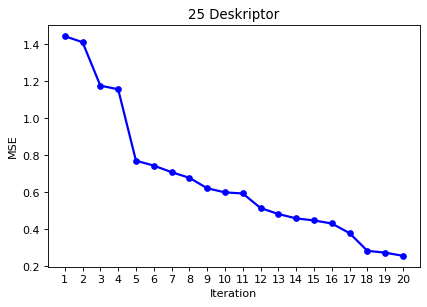

In [11]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=80)

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19','20']
y = joblib.load('./mse/mse25.pkl')
y = mse.sort_values(ascending=False)
plt.title('25 Deskriptor')
ax.set_xlabel('Iteration')
ax.set_ylabel('MSE')
ax.plot(x, y, marker='.',markersize=10, lw=2, color='b')
# plt.savefig('./line plot 10 Deskriptor.png', format='png', dpi=1000, bbox_inches="tight")
plt.show()

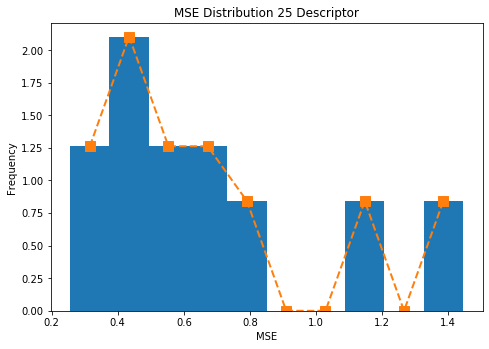

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0.5,0.5,1,1]) 
mse = joblib.load('./mse/mse25.pkl')
mse = mse.sort_values(ascending=False)

y, binEdges = np.histogram(mse, bins=10, density= True)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

plt.hist(mse, density= True, bins=10)
plt.plot(bincenters,y,'--', lw=2, marker='s', markersize='10')
plt.title('MSE Distribution 25 Descriptor')
plt.ylabel('Frequency')
plt.xlabel('MSE')
# plt.savefig('./MSE Distribution 10 Deskriptor.png', format='png', dpi=1000, bbox_inches="tight")
plt.show()